# HW Overview
`
By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

__For HW11, you will be expected to answer questions about your work in this notebook via Canvas (Modules->Module 11->HW11 Notebook and submission form). You may wish to reference this quiz while working through the assignment.__
## Submission instructions¶
Before completing this homework,
1. please review this homework's submission form on Canvas available under the "Modules" menu option and briefly review this notebook end to end.
2. To get you started we provide a template solution with missing code and prompts. Please complete the missing code, run the experiments and log your results.
3. When you're sufficiently happy with your results, please begin the submission process on Canvas. Use the submission form for this homework available under "Modules" menu option. Please note that the submission form is available at the same place where you downloaded the homework from.
4. You may wish to reference the submission form (Modules->Module 11->HW11 Notebook and submission form) while working through the tasks.

The goals of this HW include the following:
* Evaluate unlabeled data using a dendrogram
* Conduct hierarchical clustering in a pipeline
* Extend a homegrown implementation of KMeans [optional]
* Visualize cluster boundaries using KMeans   
* Dimensionality reduction with PCA

In [1]:
#prepare notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

# Task: Perform in code (check lab notebook) or by hand 

<img src="image.png" alt="Drawing" style="width: =600px;"/>

## __Question 2(a)__

In [2]:
dissimilarityMatrix = np.array([.3,.4,.7,.5,.8,.45])

[[0.   1.   0.3  2.  ]
 [2.   3.   0.45 2.  ]
 [4.   5.   0.8  4.  ]]


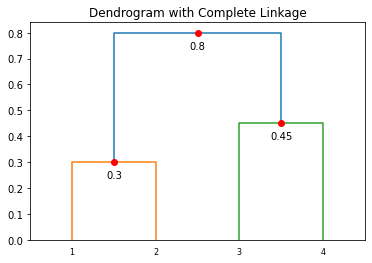

In [3]:
def augmented_dendrogram(*args, **kwargs):

    ddata = hierarchy.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')
        plt.title('Dendrogram with Complete Linkage')
    return ddata
# Use the dissimilarityMatrix to create the clustering matrix
# Make sure that the method chosen is 'complete'
#==================================================#
#               Your code starts here              #
#==================================================#

z = hierarchy.linkage(dissimilarityMatrix, 'complete')
print(z)
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

dn = augmented_dendrogram(z, labels=['1','2','3','4'], 
                         leaf_rotation=0,  
                        leaf_font_size=8.,  
)

## __Question 2(b)__

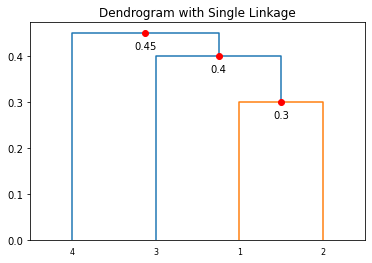

In [4]:
def augmented_dendrogram(*args, **kwargs):

    ddata = hierarchy.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')
        plt.title('Dendrogram with Single Linkage')
    return ddata

# Use the dissimilarityMatrix to create the clustering matrix
# Make sure that the method chosen is 'single'
#==================================================#
#               Your code starts here              #
#==================================================#

z = hierarchy.linkage(dissimilarityMatrix, 'single')

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

dn = augmented_dendrogram(z, labels=['1','2','3','4'],
                         leaf_rotation=0,  # rotates the x axis labels
                        leaf_font_size=8.,  # font size for the x axis labels
)

## __Question 2(c)__

Points in each cluster based on first dendrogram:



## __Question 2(d)__

Points in each cluster based on second dendrogram:


## __Question 2(e)__

In [5]:
dissimilarityMatrix = np.array([.3,.4,.7,.5,.8,.45])

[[0.   1.   0.3  2.  ]
 [2.   3.   0.45 2.  ]
 [4.   5.   0.8  4.  ]]


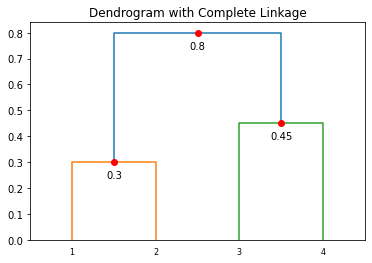

In [6]:
def augmented_dendrogram(*args, **kwargs):

    ddata = hierarchy.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')
        plt.title('Dendrogram with Complete Linkage')
    return ddata

z = hierarchy.linkage(dissimilarityMatrix, method='complete')
print (z)
# Reorder clusters in order to reposition the leaves
# But keep the same meaning of the dendogram as in question 2(a)
#==================================================#
#               Your code starts here              #
#==================================================#

z2 = np.vstack((z[0,:],z[1,:],z[2,:]))

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


dn = augmented_dendrogram(z2, labels=['1','2','3','4'], 
                         leaf_rotation=0,  
                        leaf_font_size=8.,  
)

# Hierarchical clustering  

<img src="image1.png" alt="Drawing" style="width: =600px;"/>

## __Question 3(a)__

In [7]:
df = pd.read_csv('datasets/USArrests.csv')
df.columns = ['States', 'Murder', 'Assault', 'UrbanPop', 'Rape']
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


<img src="image 4.png" alt="Drawing" style="width: =600px;"/>

The vertical axis of the dendrogram represents the distance or dissimilarity between clusters. The horizontal axis
represents the objects and clusters. The dendrogram is simple to interpret.Each joining of two clusters is represented on the graph by the splitting of
a vertical line into two vertical lines. The vertical position of the split, shown by the short horizontal bar,
gives the distance (dissimilarity) between the two clusters. 

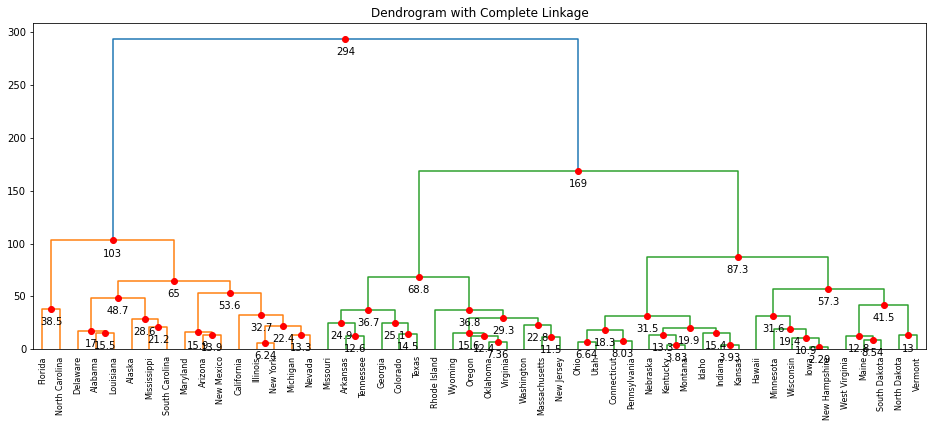

In [8]:
# separate labels from data for each observation
names = df['States'].values
observations = df.iloc[:,1:].values

# create clustering matrix using "complete" linkage and Euclidean distance
#==================================================#
#               Your code starts here              #
#==================================================#

linkage = hierarchy.linkage(observations, method='complete', metric='euclidean')

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

# plot a dendrogram of the hierarchical clustering
plt.figure(figsize=(16,6))
dd = augmented_dendrogram(linkage, leaf_rotation=90, labels=names)

## __Question 3(b)__

In [9]:
# generate 3 clusters based on observations data
# using "complete" linkage and Euclidean distance
# and predict the states that belong to each cluster
#==================================================#
#               Your code starts here              #
#==================================================#

ac = AgglomerativeClustering(n_clusters=3, linkage='complete',  affinity='euclidean')
preds = ac.fit_predict(observations)

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

# identify the indices corresponding to each cluster
clusters = []
for n in set(preds):
    clusters.append(np.where(preds==n)[0])

# display state names corresponding to the cluster indices
for n in range(3):
    print('Cluster {}: {}\n'.format(n+1, names[clusters[n]]))

Cluster 1: ['Alabama' 'Alaska' 'Arizona' 'California' 'Delaware' 'Florida' 'Illinois'
 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Nevada' 'New Mexico'
 'New York' 'North Carolina' 'South Carolina']

Cluster 2: ['Connecticut' 'Hawaii' 'Idaho' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Maine' 'Minnesota' 'Montana' 'Nebraska' 'New Hampshire' 'North Dakota'
 'Ohio' 'Pennsylvania' 'South Dakota' 'Utah' 'Vermont' 'West Virginia'
 'Wisconsin']

Cluster 3: ['Arkansas' 'Colorado' 'Georgia' 'Massachusetts' 'Missouri' 'New Jersey'
 'Oklahoma' 'Oregon' 'Rhode Island' 'Tennessee' 'Texas' 'Virginia'
 'Washington' 'Wyoming']



## __Question 3(c)__

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# create a pipeline that uses StandardScaler to standardize the data
# Then uses AgglomerativeClustering to generate 3 clusters based on observations data
# using "complete" linkage and Euclidean distance
# and predict the states that belong to each cluster
#==================================================#
#               Your code starts here              #
#==================================================#

pipeline = make_pipeline(StandardScaler(), ac)
preds_std=pipeline.fit_predict(observations)

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
clusters_std = []
for n in set(preds_std):
    clusters_std.append(np.where(preds_std==n)[0])
# display state names corresponding to the cluster indices
for n in range(3):
    print('Cluster {}: {}\n'.format(n+1, names[clusters_std[n]]))

Cluster 1: ['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Maine' 'Massachusetts' 'Minnesota' 'Missouri'
 'Montana' 'Nebraska' 'New Hampshire' 'New Jersey' 'North Dakota' 'Ohio'
 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']

Cluster 2: ['Alabama' 'Alaska' 'Georgia' 'Louisiana' 'Mississippi' 'North Carolina'
 'South Carolina' 'Tennessee']

Cluster 3: ['Arizona' 'California' 'Colorado' 'Florida' 'Illinois' 'Maryland'
 'Michigan' 'Nevada' 'New Mexico' 'New York' 'Texas']



## __Question 3(d)__

What effect did scaling have (compare scaled output in part c to original output in part b above). In your opinion should the variables be scaled before the inter-observation dissimilarities are computed? provide a justification for your answer. You can use the results of the silhouette scores obtained in 3.4.1

### Silhouette coefficient
If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

* a: The mean distance between each sample point and all other points in the same class.
* b: The mean distance between each sample  point and all other points in the next nearest cluster.
The Silhouette Coefficient s for a single sample is then given as:  
$ s = \frac{b - a}{max(a, b)} $  
The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.
* __Example__:  
The following example shows how the silhouette score is calculated for different clustering scenarios. You can see that in the second case, when the points of the first cluster are closer to each other and far from the point in cluster 2 the silhouette score increases

The silhouette score is :  0.436
The silhouette score is :  0.807


[Text(0.5, 1.0, 'Cluster example 2\nCompact clusters that are far apart\nsilhouette_score: 0.807')]

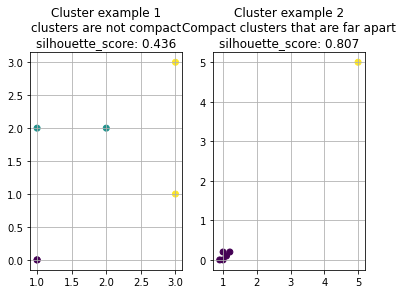

In [11]:
import numpy as np
from sklearn.metrics import silhouette_score
import scipy, pylab
import matplotlib.pyplot as plt

example_points= np.array([[1,0],[1,0],[1,2],[2,2],[3,1],[3,3]])
clusters= [1,1,2,2,3,3]
# Create figure
fig, ((ax1, ax2)) = plt.subplots(1, 2)

ax1.scatter(example_points[:,0],example_points[:,1],c=clusters)
ax1.set(title=f"Cluster example 1\nclusters are not compact\nsilhouette_score: {np.round(silhouette_score(example_points, clusters, metric='euclidean'),3)}")
ax1.grid()

print("The silhouette score is : ",np.round(silhouette_score(example_points, clusters, metric='euclidean'),3))
example_points= np.array([[1,0],[1.1,0.1],[1.2,0.2],[0.9,0],[1,0.2],[5,5]])
clusters= [1,1,1,1,1,2]
print("The silhouette score is : ",np.round(silhouette_score(example_points, clusters, metric='euclidean'),3))

ax2.scatter(example_points[:,0],example_points[:,1],c=clusters)
ax2.grid()
ax2.set(title=f"Cluster example 2\nCompact clusters that are far apart\nsilhouette_score: {np.round(silhouette_score(example_points, clusters, metric='euclidean'),3)}")
#plt.show()

In [12]:
print("The silhouette score of the first clustering (no standardization) is : ",np.round(silhouette_score(observations, preds, metric='euclidean'),3))
print("The silhouette score of the second clustering (standardized data) is : ",np.round(silhouette_score(observations, preds_std, metric='euclidean'),3))
    

The silhouette score of the first clustering (no standardization) is :  0.532
The silhouette score of the second clustering (standardized data) is :  0.357


# PCA + Logistic Regression on the MNIST dataset

The MNIST dataset contains 70,000 handwritten digits (60,000 training images and 10,000 test images).  Each has been size-normalized and centered in a fixed-size image. The originial dataset and additional information is hosted <a href='http://yann.lecun.com/exdb/mnist/'>here</a>, but it requires some effort to decompress and load.  



## Approximating image data using PCA

### Download MNIST from openml.org

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

#Normalize the image intensity data
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
np.random.seed(12)


Automatically created module for IPython interactive environment


Typically the train test split is 80% training and 20% test. 
In this case, we will use 6/7th of the data to be training and 1/7th of the data to be in the test set.

In [ ]:
train_img, test_img, train_lbl, test_lbl = train_test_split(X_train, y_train, test_size=1/7.0, random_state=12)

In [ ]:
train_img=train_img.to_numpy()
test_img=test_img.to_numpy()

In [ ]:
X_train.shape

Select enough components to account for .95 of explained variance.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca_train_img = pca.fit_transform(train_img)
pca.n_components_

Restore image using pca transformed data.

In [ ]:
approximation = pca.inverse_transform(pca_train_img)

Compare original image to an approximation based on 95% of explained variance.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(train_img[0].reshape(28,28)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[0].reshape(28, 28)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

If n_components is not set all components are kept (784 in this case).

In [ ]:
pca = PCA()
pca.fit(train_img)
pca.n_components_

In [ ]:
# Summing explained variance
tot = sum(pca.explained_variance_)
print('Total explained variance:',tot)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print('Percentage of explained variance associated with top 5 components:\n',var_exp[0:5])

In [ ]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

Plot can help you understand the level of redundancy present in multiple dimensions.


In [ ]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.grid()
plt.show()

## Number of Principal Components for 99%, 95%, 90%, and 85% of Explained Variance

In [ ]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]
componentsVariance

In [ ]:
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

In [ ]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(train_img[5].reshape(28,28)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, train_img)[5].reshape(28, 28)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, train_img)[5].reshape(28, 28)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, train_img)[5].reshape(28, 28)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, train_img)[5].reshape(28, 28)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

### __TASK__ : logistic regression  model using 40 components
Report the test accuracy of a logistic regression  model trained using 40 components

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# create a pipeline that instatnciates a logistic regression model in 'sag' mode with max_iter = 1000
# using 40 PCA components
# and fit the train_img and train_lbl
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = make_pipeline(PCA(n_components=40), LogisticRegression(solver='sag', max_iter=1000))
pipeline.fit(train_img,train_lbl)
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
preds = pipeline.predict(test_img)
acc = accuracy_score(test_lbl, preds)
print('Accuracy of logistic regression with 40 PCA components:', np.round(acc,3))

### __TASK__ : Approximation of original data
PCA can be used to compress high dimensional data to lower dimensional data. PCA can also take the compressed representation of the data (lower dimensional data) back to an approximation of the original high dimensional data. 
* Select a number from __from the MNIST test data generated with the split above__. 
* Show a visualization of the chosen example (original image) __and__ the same image in an approximated form using the first 40 principal components.

In [ ]:
def rmse(imageA, imageB):
    # the 'Root Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return np.sqrt(err)

In [ ]:
# Use 40 pca componenents and fit the train_img data and use random state as 12
# transform test_img[12] (use reshape(1,-1) for the image)
# and approximate the original image.
#==================================================#
#               Your code starts here              #
#==================================================#
pca = PCA(n_components=40)
pca.fit(train_img)
components = pca.transform(test_img[12].reshape(1,-1))
approximation = pca.inverse_transform(components)
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
original = test_img[12]
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(original.reshape(28,28)*255, cmap=plt.cm.gray)
plt.title('Original Test Image \n(784 components)')
plt.xticks([]); plt.yticks([])
plt.subplot(122)
plt.imshow(approximation.reshape(28,28)*255, cmap=plt.cm.gray)
plt.title('Approximation \n(40 components)')
plt.xticks([]); plt.yticks([]);
difference=rmse(original.reshape(28,28)*255,approximation.reshape(28,28)*255) 
print ("The average difference between the two images is : ", np.round(difference,3))

### __TASK__ : Decision tree with 95% explained variance
Report the test accuracy of a decision tree model trained using components that account for 95% of the explained variance 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
np.random.seed(12)
# create a pipeline that instatnciates a Decision tree classifier
# using components that explain 95% of the variance
# and fit the train_img and train_lbl
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = make_pipeline(PCA(n_components=154), DecisionTreeClassifier())
pipeline.fit(train_img,train_lbl)
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
preds = pipeline.predict(test_img)
acc = accuracy_score(test_lbl, preds)
print('Accuracy of Decision tree with 95% explained variance:', np.round(acc,3))

# [Optional] Homegrown KMeans Extension

The  code below is a homegrown implementation of the KMeans algorithm. Study it carefully! 

For more background on this homegrown version of KMeans, please see this related [article](https://flothesof.github.io/k-means-numpy.html). This article presents lots of useful background information on the following:

* Presents `broadcasting` a core piece of functionality underlying numpy 
* How to animate intermediate results of KMeans using a module called `JSAnimation`


In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
import random
from functools import reduce, partial
from operator import add
%matplotlib inline

class KMeans:
    """good old class based solution"""
    def __init__(self, k):
        self.k = k
        self.means = [None for _ in range(k)]
        
    def initialize_centroids(self, X):
        """returns k centroids from the initial points"""
        centroids = X.copy()
        np.random.shuffle(centroids)
        self.means = centroids[:self.k]
        return 

    def fit(self, X, num_iters=10):
        self.initialize_centroids(X)
        for _ in range(num_iters):
            # E-Step: assign each example to the nearest cluster
            assignments = self.predict(X)  
            #M-Step: for each cluster estimate new centroid based on cluster assigments
            self.means = np.array([points[assignments==k].mean(axis=0) for k in range(self.k)])
            

    '''
     # Broadcasting in the predict() method
     
     We will use numpy broadcasting to do cluster assignments in the predict() method. 
     One of the interesting things with numpy is that we can extend an array 
     by a new dimension using the np.newaxis() method. Here we go from a 2D array of centroids to 
     3D array. This allows us to substract this array from an existing point p, 
     due to the fact that numpy applies broadcasting rules to array of non-matching 
     sizes which allow for efficient operations
     his is described in detail in the broadcasting section of the following document:
     
     http://nbviewer.ipython.org/url/www.astro.washington.edu/users/vanderplas/Astr599_2014/notebooks/11_EfficientNumpy.ipynb).
    '''
    def predict(self, X):
        """returns an array containing the index to the nearest centroid for each point"""
        distances = np.sqrt(((X - self.means[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)


    
def run_kmeans(points, k=3):
    # Complete the code below to train a Kmeans model
    # using k clsuters, fit points using 100 iterations (num_iters)
    # and predict the cluster for each point
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    model = KMeans(...)
    model.fit(..., ...)
    assignments = model.predict(...) 
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    print ("the point points[75] is assigned to cluster",assignments[75])
    for x, y in model.means:
        plt.plot(x, y, marker='X', markersize=20, color='Black')

    for j, color in zip(range(k),
                      ['r', 'g', 'b', 'm', 'c']):
        cluster = [p
                   for p, c in zip(points, assignments)
                   if j == c]
        xs, ys = zip(*cluster)
        plt.scatter(xs, ys, color=color)

    plt.show()

#Generate some data
np.random.seed(42)
points = np.random.random((100,2))
run_kmeans(points, 3)


##  TASK: Extend the KMeans  implementation above with KMean++ 

How does the execution of the original KMeans code change when using KMeans++? Discuss. HINT: number of iterations.


In [ ]:
class KPlusPlus(KMeans):
    
    def _choose_next_center(self, X, distances):
        self.probs = distances/distances.sum()
        self.cumprobs = self.probs.cumsum()
        random.seed(42)
        r = random.random()
        ind = np.where(self.cumprobs >= r)[0][0]
        return([np.array(X[ind])])

    def initialize_centroids(self, X):
        random.seed(42)
        self.means = np.array(random.sample(list(X), 1))
        while len(self.means) < self.k:
            # Complete the missing parts of the following code 
            # in order to calculate the minimum euclidian distance
            # of each point from each center
            #==================================================#
            #               Your code starts here              #
            # try the debugger!
            #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
            # HINT
            distances = np.min(, axis=0)
            self.means = np.append(..., self._choose_next_center(....., distances), axis = 0)
            #==================================================#
            #               Your code ends here                #
            #               Please don't add code below here   #
            #==================================================#        
        return 

In [ ]:
kpp = KPlusPlus(3)
kpp.fit(points)

In [ ]:
np.random.seed(42)
assignments = [kpp.predict(point) for point in points]

for x, y in kpp.means:
    plt.plot(x, y, marker='X', markersize=20, color='Black')

for j, color in zip(range(3), ['r', 'g', 'b', 'm', 'c']):
    cluster = [p for p, c in zip(points, assignments)if j == c]
    xs, ys = zip(*cluster)
    plt.scatter(xs, ys, color=color)
    
plt.show()
print ("the point points[50] is assigned to cluster",assignments[50])


# [Optional Task] Mickey Mouse case study: Plot cluster boundaries for first 10 iterations

Generate a plausible  artificial "mouse" dataset depicted below (with the ground truth). 



<img src="image2.png" alt="Drawing" style="width: =300px;"/>

Using the homegrown Kmeans (KMeans++) plot the decision boundaries iteration by iteration for the first 10 iterations using 3 clusters. A plot like the following be sufficient.

<img src="image3.png" alt="Drawing" style="width: =300px;"/>

## Generate dataset

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
# Complete the missing parts of the following code 
# in order to create three clusters of points where:
# the first cluster has a (-1,2) center, .3 std and random_state=42
# the second cluster has a (.5,.5) center, .7 std and random_state=41
# the third cluster has a (2,2) center, .3 std and random_state=40
#==================================================#
#               Your code starts here              #
#==================================================#
x1, y1 = make_blobs(200, 2, centers = [[..]], cluster_std=.., ...)
x2, y2 = make_blobs(200, 2, centers = [[..]], cluster_std=.., ...)
x3, y3 = make_blobs(200, 2, centers = [[..]], cluster_std=.., ...)
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
y2 = np.full_like(y1, 1)
y3 = np.full_like(y1, 2)


In [ ]:
points = np.append(np.append(x1, x2, axis=0), x3, axis=0)
y = np.append(y1,(y2, y3))
true_clusters =np.concatenate((np.repeat(0, 200), np.repeat(1, 200),np.repeat(2, 200)))

In [ ]:
plt.scatter(points[:,0],points[:,1],c=y)

## Fit homegrown KMeans++

In [ ]:
# Complete the code below to train a KPlusPlus model
# using 3 clsuters, fit points 
# and predict the cluster for each point
#==================================================#
#               Your code starts here              #
#==================================================#
model = KPlusPlus(...)
model.fit(..., ...)
assignments = model.predict(...)
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

## Plot decision boundaries

In [ ]:
# plot the decision surface
x1_min, x1_max = points[:, 0].min() - .1, points[:, 0].max() + .1
x2_min, x2_max = points[:, 1].min() - .1, points[:, 1].max() + .1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, .005), np.arange(x2_min, x2_max, .005))
Z = np.array([kpp.predict(point) for point in np.array([xx1.ravel(), xx2.ravel()]).T])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for x, y in kpp.means:
    plt.plot(x, y, marker='X', markersize=20, color='Black')

for j, color in zip(range(3), ['r', 'g', 'b', 'm', 'c']):
    cluster = [p for p, c in zip(points, assignments)if j == c]
    xs, ys = zip(*cluster)
    plt.scatter(xs, ys)
    
plt.show()


### Completness score
Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

* homogeneity: each cluster contains only members of a single class.
* completeness: all members of a given class are assigned to the same cluster.

Homogeneity and completeness scores are formally given by:
* $ h = 1 - \frac{H(C|K)}{H(C)}$
* $c = 1 - \frac{H(K|C)}{H(K)}$

where H(C|K) is the conditional entropy of the classes given the cluster assignments and is given by:  
    $H(C|K) = - \sum_{c=1}^{|C|} \sum_{k=1}^{|K|} \frac{n_{c,k}}{n}\cdot \log\left(\frac{n_{c,k}}{n_k}\right)$
    
and H(C) is the entropy of the classes and is given by:  
$H(C) = - \sum_{c=1}^{|C|} \frac{n_c}{n} \cdot \log\left(\frac{n_c}{n}\right)$   


with n the total number of samples, $n_c$ and $n_k$ the number of samples respectively belonging to class c and cluster k, and finally $n_c,k$ the number of samples from class c assigned to cluster k.

The conditional entropy of clusters given class $H(K|C)$ and the entropy of clusters $H(K)$ are defined in a symmetric manner.

* __Example__:  
The following example shows how the completeness score is calculated for different clustering scenarios

In [ ]:
from sklearn.metrics.cluster import completeness_score
import scipy, pylab
import matplotlib.pyplot as plt
# example 1
example_points= np.array([[1,0],[1,1],[1,2],[2,2],[3,1],[3,3]])
labels_true, labels_pred = [0, 0, 1, 1,2,2], [1, 1, 2,2, 0, 0]
fig, ((ax1, ax2)) = plt.subplots(1, 2)
fig.suptitle(f"Example 1: completeness_score({labels_true, labels_pred})= {completeness_score(labels_true, labels_pred)}", fontsize=14)
plt.subplots_adjust(top=0.85)
ax1.scatter(example_points[:,0],example_points[:,1],c=labels_true)
ax1.set(title="Example 1 True clusters")
ax1.grid()
ax2.scatter(example_points[:,0],example_points[:,1],c=labels_pred)
ax2.grid()
ax2.set(title="Example 1 predicted clusters")
plt.show()
labels_true, labels_pred = [0, 0, 1, 1,2,2], [1, 1, 1,2, 0, 0]
fig1, ((ax11, ax12)) = plt.subplots(1, 2)
fig1.suptitle(f"Example 2: completeness_score({labels_true, labels_pred})= {np.round(completeness_score(labels_true, labels_pred),3)}", fontsize=14)
plt.subplots_adjust(top=0.85)
ax11.scatter(example_points[:,0],example_points[:,1],c=labels_true)
ax11.set(title="Example 2 True clusters")
ax11.grid()
ax12.scatter(example_points[:,0],example_points[:,1],c=labels_pred)
ax12.grid()
ax12.set(title="Example 2 predicted clusters")
plt.show()



__TASK__: Calculate the completeness score for the homegrown kmeans results obtained in section 6.2

In [ ]:
from sklearn.metrics.cluster import completeness_score
print("The completeness score is : ",np.round(completeness_score(labels_pred=assignments,labels_true =true_clusters),3))

### Silhouette coefficient
If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

* a: The mean distance between each sample point and all other points in the same class.
* b: The mean distance between each sample  point and all other points in the next nearest cluster.
The Silhouette Coefficient s for a single sample is then given as:  
$ s = \frac{b - a}{max(a, b)} $  
The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.
* __Example__:  
The following example shows how the silhouette score is calculated for different clustering scenarios. You can see that in the second case, when the points of the first cluster are closer to each other and far from the point in cluster 2 the silhouette score increases

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
import scipy, pylab
import matplotlib.pyplot as plt

example_points= np.array([[1,0],[1,1],[1,2],[2,2],[3,1],[3,3]])
clusters= [1,1,2,2,3,3]
# Create figure
fig, ((ax1, ax2)) = plt.subplots(1, 2)

ax1.scatter(example_points[:,0],example_points[:,1],c=clusters)
ax1.set(title=f"Cluster example 1\nclusters are not compact\nsilhouette_score: {np.round(silhouette_score(example_points, clusters, metric='euclidean'),3)}")
ax1.grid()

print("The silhouette score is : ",np.round(silhouette_score(example_points, clusters, metric='euclidean'),3))
example_points= np.array([[1,0],[1.1,0.1],[1.2,0.2],[0.9,0],[1,0.2],[5,5]])
clusters= [1,1,1,1,1,2]
print("The silhouette score is : ",np.round(silhouette_score(example_points, clusters, metric='euclidean'),3))

ax2.scatter(example_points[:,0],example_points[:,1],c=clusters)
ax2.grid()
ax2.set(title=f"Cluster example 2\nCompact clusters that are far apart\nsilhouette_score: {np.round(silhouette_score(example_points, clusters, metric='euclidean'),3)}")
#plt.show()

__TASK__: Calculate the silhouette score for the homegrown kmeans results obtained in section 6.2

In [ ]:
from sklearn.metrics import silhouette_score
print("The silhouette score is : ",np.round(silhouette_score(points, assignments, metric='euclidean'),3))

### Elbow method: determine best K
When fitting the Kmeans algorithm we chose to assign the different points into 3 cluster. Here we are using the elbow method in order to determine if there's a better number of clusters that we can choose using the k-means inertia graph. We will plot a line chart of the SSE (Sum of squared errors) for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. 

In [ ]:
from sklearn.cluster import KMeans
ks = range(2, 7)
inertias = []

for k in ks:
    # Create a KMeans (using sklearn) instance with k clusters: model 
    # Fit model to samples
    # and append the inertia to the list of inertias
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    model = 
    model.fit(...)
    inertias.append(...)
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Elbow Method for Identifying K Clusters')
plt.grid()
plt.show()

In [ ]:
import os
os.system('jupyter nbconvert --to html HW-11-Unsupervised-ML-Kmeans-PCA-HierarchClust_Copy.ipynb')